In [1]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''
Out of a total of 345 categories of doodles from the Google's 
Quick Draw Application, we selected 10 classes for our project.
'''

airplane = np.load('dataset/airplane.npy')
axe = np.load('dataset/axe.npy')
basketball = np.load('dataset/basketball.npy')
bicycle = np.load('dataset/bicycle.npy')
camera = np.load('dataset/camera.npy')
diamond = np.load('dataset/diamond.npy')
donut = np.load('dataset/donut.npy')
envelope = np.load('dataset/envelope.npy')
fish = np.load('dataset/fish.npy')
helicopter = np.load('dataset/helicopter.npy')

In [2]:
IMAGES = np.concatenate((airplane, axe, basketball, bicycle, camera, diamond, donut, envelope, fish, helicopter), axis = 0)

y_airplane = np.zeros(len(airplane), dtype = np.uint)
y_axe = np.ones(len(axe), dtype = np.uint)

y_basketball = np.empty(len(basketball),dtype = np.uint)
y_basketball.fill(2)

y_bicycle = np.empty(len(bicycle),dtype = np.uint)
y_bicycle.fill(3)

y_camera = np.empty(len(camera),dtype = np.uint)
y_camera.fill(4)

y_diamond = np.empty(len(diamond),dtype = np.uint)
y_diamond.fill(5)

y_donut = np.empty(len(donut),dtype = np.uint)
y_donut.fill(6)

y_envelope = np.empty(len(envelope),dtype = np.uint)
y_envelope.fill(7)

y_fish = np.empty(len(fish),dtype = np.uint)
y_fish.fill(8)

y_helicopter = np.empty(len(helicopter),dtype = np.uint)
y_helicopter.fill(9)

LABELS = np.concatenate((y_airplane, y_axe, y_basketball, y_bicycle, y_camera, y_diamond, y_donut, y_envelope, y_fish, y_helicopter), axis = 0 )

In [15]:
sample_size = 500

IMAGES = np.concatenate((airplane[:sample_size], axe[:sample_size], basketball[:sample_size], bicycle[:sample_size], camera[:sample_size], diamond[:sample_size], donut[:sample_size], envelope[:sample_size], fish[:sample_size], helicopter[:sample_size]), axis=0)
LABELS = np.concatenate((y_airplane[:sample_size], y_axe[:sample_size], y_basketball[:sample_size], y_bicycle[:sample_size], y_camera[:sample_size], y_diamond[:sample_size], y_donut[:sample_size], y_envelope[:sample_size], y_fish[:sample_size], y_helicopter[:sample_size]), axis = 0 )

# Visualization using TMAP (Tree MAP) and Faerun

In [17]:
from PIL import Image
from io import BytesIO
import base64
from faerun import Faerun
import tmap as tm

IMAGE_LABELS = []

# Coniguration for the tmap layout
CFG = tm.LayoutConfiguration()
CFG.node_size = 1 / 50

def main():
    """ Main function """

    # Initialize and configure tmap
    dims = 1024
    enc = tm.Minhash(28 * 28, 42, dims)
    lf = tm.LSHForest(dims, 128)

    print("Converting images ...")
    for image in IMAGES:
        img = Image.fromarray(np.uint8(np.split(np.array(image), 28)))
        buffered = BytesIO()
        img.save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue())
        IMAGE_LABELS.append(
            "data:image/bmp;base64," + str(img_str).replace("b'", "").replace("'", "")
        )
    tmp = []
    for _, image in enumerate(IMAGES):
        tmp.append(tm.VectorFloat(image / 255))

    print("Running tmap ...")
    lf.batch_add(enc.batch_from_weight_array(tmp))
    lf.index()
    x, y, s, t, _ = tm.layout_from_lsh_forest(lf, CFG)

    legend_labels = [
        (0, "Airplane"),
        (1, "Axe"),
        (2, "Basketball"),
        (3, "Bicycle"),
        (4, "Camera"),
        (5, "Diamond"),
        (6, "Donut"),
        (7, "Envelope"),
        (8, "Fish"),
        (9, "Helicopter"),
    ]

    df = pd.DataFrame({"x": x, "y": y, "c": LABELS, "labels": IMAGE_LABELS})

    faerun = Faerun(clear_color="#111111", view="free", coords=False)
    faerun.add_scatter(
        "DOODLES",
        data=df,
        colormap="tab10",
        shader="sphere",
        point_scale=10,
        max_point_size=20,
        has_legend=True,
        categorical=True,
        legend_labels=legend_labels,
    )
    faerun.add_tree(
        "DOODLE_tree", {"from": s, "to": t}, point_helper="DOODLES", color="#666666"
    )
    faerun.plot("doodlestmap", template="url_image")
main()

Converting images ...
Running tmap ...


d:\Python\MLProject\doodles.html

# Visualizing using UMAP (Uniform Manifold Projection)

In [19]:
import umap

reducer = umap.UMAP(n_components=3)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(IMAGES)

In [21]:
embedding = reducer.fit_transform(data)
embedding.shape

(5000, 3)

## Using Matplotlib

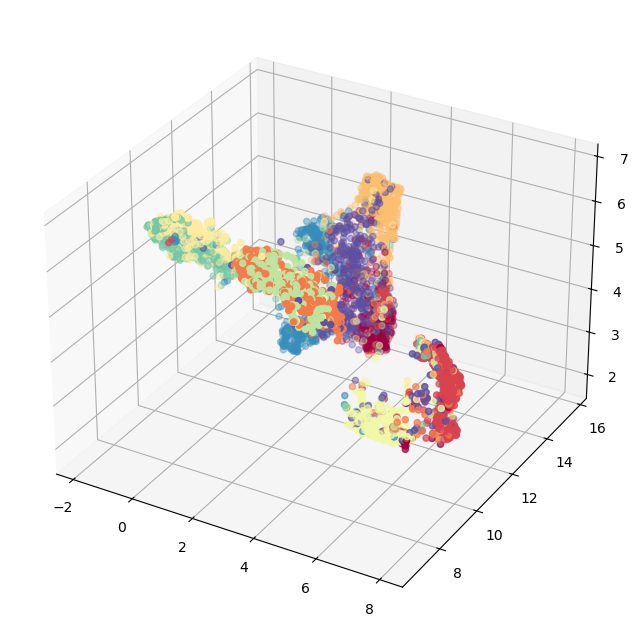

In [22]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=LABELS, cmap='Spectral')
plt.show()

## Using Faerun

In [23]:
from faerun import Faerun
from PIL import Image
from io import BytesIO
import base64

IMAGE_LABELS = []

for image in IMAGES:
    img = Image.fromarray(np.uint8(np.split(np.array(image), 28)))
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    IMAGE_LABELS.append(
        "data:image/bmp;base64," + str(img_str).replace("b'", "").replace("'", "")
    )

df = pd.DataFrame({"x": embedding[:,0], "y": embedding[:,1], "z": embedding[:, 2], "c": LABELS, "labels": IMAGE_LABELS})
legend_labels = [
    (0, "Airplane"),
    (1, "Axe"),
    (2, "Basketball"),
    (3, "Bicycle"),
    (4, "Camera"),
    (5, "Diamond"),
    (6, "Donut"),
    (7, "Envelope"),
    (8, "Fish"),
    (9, "Helicopter"),
]
faerun = Faerun(clear_color="#111111", view="free", coords=False)
faerun.add_scatter(
    "DOODLES",
    data=df,
    colormap="tab10",
    shader="sphere",
    point_scale=5,
    max_point_size=20,
    has_legend=True,
    categorical=True,
    legend_labels=legend_labels,
)
faerun.plot("doodlesumap", template="url_image")

d:\Python\MLProject\doodles.html